In [2]:
pip install QuantLib

  Obtaining dependency information for QuantLib from https://files.pythonhosted.org/packages/de/1d/fa4b7a280435a4181f30c8b040aab1c18780da79e07caa66865a9e7087cf/QuantLib-1.31.1-cp38-cp38-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 1.5 MB/s eta 0:00:0000:0100:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Option parameters
spot_price = 500.0  # Spot price of the underlying asset
strike_price = 150.0  # Strike price of the option
risk_free_rate = 0.06  # Risk-free interest rate
dividend_rate = 0.05  # Dividend yield of the underlying asset
expiration_date = ql.Date(31, 12, 2023)  # Expiration date of the option
steps = 100  # Number of time steps in the binomial tree

In [20]:
# QuantLib objects
calculation_date = ql.Date(1, 1, 2023)
ql.Settings.instance().evaluationDate = calculation_date

In [21]:
# Define the option
payoff = ql.PlainVanillaPayoff(ql.Option.Call, strike_price)
exercise = ql.EuropeanExercise(expiration_date)
option = ql.VanillaOption(payoff, exercise)

In [22]:
# Define the underlying asset
spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, ql.Actual365Fixed())
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, ql.Actual365Fixed())
)
volatility = 0.2  # Volatility of the underlying asset
volatility_handle = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, ql.TARGET(), volatility, ql.Actual365Fixed())
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, volatility_handle)

In [23]:
# Create the binomial tree
binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
option.setPricingEngine(binomial_engine)

In [24]:
# Calculate the option price for a range of underlying prices
underlying_prices = np.linspace(80, 120, 100)
option_prices = []

for price in underlying_prices:
    spot_handle = ql.QuoteHandle(ql.SimpleQuote(price))
    bsm_process = ql.BlackScholesMertonProcess(spot_handle, dividend_yield, flat_ts, volatility_handle)
    option.setPricingEngine(ql.BinomialVanillaEngine(bsm_process, "crr", steps))
    option_prices.append(option.NPV())

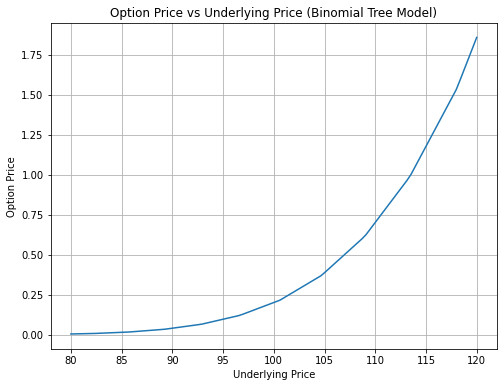

In [25]:
# Plot the option price as a function of the underlying price
plt.figure(figsize=(8, 6))
plt.plot(underlying_prices, option_prices)
plt.xlabel("Underlying Price")
plt.ylabel("Option Price")
plt.title("Option Price vs Underlying Price (Binomial Tree Model)")
plt.grid(True)
plt.show()